In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
#csv file
df = pd.read_csv("/content/weatherHistory.csv")

## **Data** **cleaning**

In [ ]:
df.isnull().sum()          #show all the null values

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)     #removes all the null values

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
print(df.duplicated())     #show all the duplicated values

0        False
1        False
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Length: 95936, dtype: bool


## **Data preprocessing**

In [ ]:
df.head(10) #show the first 10 rows

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
df.tail(10)    #show the last 10 rows

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96443,2016-09-09 14:00:00.000 +0200,Partly Cloudy,rain,30.894444,29.450000,0.28,14.7798,43.0,15.5526,0.0,1014.66,Partly cloudy starting in the morning.
96444,2016-09-09 15:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.616667,0.28,15.5043,40.0,16.1000,0.0,1014.17,Partly cloudy starting in the morning.
96445,2016-09-09 16:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.611111,0.28,13.8943,40.0,16.1000,0.0,1013.97,Partly cloudy starting in the morning.
96446,2016-09-09 17:00:00.000 +0200,Partly Cloudy,rain,30.766667,29.311111,0.28,14.2163,24.0,15.5526,0.0,1013.83,Partly cloudy starting in the morning.
96447,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21.0,16.1000,0.0,1014.07,Partly cloudy starting in the morning.
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [ ]:
df.info()   #show the details

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [ ]:
df.iloc[30:51]     #print from row to row

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
30,2006-04-10 06:00:00.000 +0200,Mostly Cloudy,rain,7.261111,5.155556,0.85,11.1734,141.0,6.1985,0.0,1014.52,Mostly cloudy throughout the day.
31,2006-04-10 07:00:00.000 +0200,Mostly Cloudy,rain,7.800000,5.527778,0.83,12.8156,150.0,8.0500,0.0,1014.16,Mostly cloudy throughout the day.
32,2006-04-10 08:00:00.000 +0200,Mostly Cloudy,rain,9.872222,7.933333,0.78,13.7494,160.0,9.9820,0.0,1014.24,Mostly cloudy throughout the day.
33,2006-04-10 09:00:00.000 +0200,Mostly Cloudy,rain,12.222222,12.222222,0.72,15.6331,150.0,9.9820,0.0,1014.25,Mostly cloudy throughout the day.
34,2006-04-10 10:00:00.000 +0200,Mostly Cloudy,rain,15.094444,15.094444,0.61,17.5490,151.0,9.9820,0.0,1013.96,Mostly cloudy throughout the day.
35,2006-04-10 11:00:00.000 +0200,Mostly Cloudy,rain,17.355556,17.355556,0.52,22.7815,169.0,9.9820,0.0,1013.85,Mostly cloudy throughout the day.
36,2006-04-10 12:00:00.000 +0200,Mostly Cloudy,rain,19.005556,19.005556,0.46,23.8924,169.0,9.9820,0.0,1013.04,Mostly cloudy throughout the day.
37,2006-04-10 13:00:00.000 +0200,Mostly Cloudy,rain,20.044444,20.044444,0.40,28.3682,170.0,9.9820,0.0,1012.22,Mostly cloudy throughout the day.
38,2006-04-10 14:00:00.000 +0200,Mostly Cloudy,rain,21.050000,21.050000,0.40,26.9031,187.0,10.3523,0.0,1011.44,Mostly cloudy throughout the day.
39,2006-04-10 15:00:00.000 +0200,Mostly Cloudy,rain,21.183333,21.183333,0.37,25.6956,179.0,9.9820,0.0,1010.52,Mostly cloudy throughout the day.


In [ ]:
df.describe()     #calculate all the mathamatical relations

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df.groupby('Visibility (km)')[['Temperature (C)']].mean()   #grouping by two coloums with the mean

,Temperature (C)
Visibility (km),
0.0000,4.790703
0.0161,-0.764327
0.0322,1.569722
0.0483,1.738889
0.0644,-2.780000
...,...
15.9873,9.350000
16.0195,11.005556
16.0517,11.270102


In [ ]:
df[df["Visibility (km)"]<10]     #filtering the coloum

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.982,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.982,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.982,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.982,0.0,1017.22,Partly cloudy throughout the day.
21,2006-04-01 21:00:00.000 +0200,Mostly Cloudy,rain,11.183333,11.183333,0.76,4.9266,160.0,9.982,0.0,1015.77,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96370,2016-09-06 13:00:00.000 +0200,Mostly Cloudy,rain,21.038889,21.038889,0.63,12.3487,59.0,9.982,0.0,1017.44,Mostly cloudy starting overnight.
96372,2016-09-06 15:00:00.000 +0200,Mostly Cloudy,rain,22.155556,22.155556,0.64,15.9390,69.0,9.982,0.0,1018.05,Mostly cloudy starting overnight.
96373,2016-09-06 16:00:00.000 +0200,Mostly Cloudy,rain,22.200000,22.200000,0.59,9.4024,58.0,9.982,0.0,1018.16,Mostly cloudy starting overnight.
96375,2016-09-06 18:00:00.000 +0200,Mostly Cloudy,rain,21.038889,21.038889,0.64,11.0124,59.0,9.982,0.0,1019.36,Mostly cloudy starting overnight.


In [ ]:
df.sample(20)      #print 20 random sample

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
75066,2014-06-03 21:00:00.000 +0200,Mostly Cloudy,rain,15.994444,15.994444,0.67,7.9051,351.0,10.2557,0.0,1013.93,Mostly cloudy throughout the day.
61917,2013-04-29 21:00:00.000 +0200,Mostly Cloudy,rain,21.050000,21.050000,0.53,12.1877,161.0,9.9820,0.0,1018.57,Partly cloudy until night.
47321,2011-01-31 17:00:00.000 +0100,Foggy,snow,-3.916667,-3.916667,0.99,4.7495,29.0,2.5277,0.0,1028.00,Foggy starting overnight continuing until even...
39225,2010-07-29 09:00:00.000 +0200,Mostly Cloudy,rain,22.155556,22.155556,0.65,1.9320,259.0,9.9820,0.0,1012.82,Partly cloudy until night.
25950,2008-09-22 06:00:00.000 +0200,Overcast,rain,7.311111,7.311111,0.93,3.3649,291.0,4.6690,0.0,1015.51,Mostly cloudy throughout the day.
8487,2006-09-25 15:00:00.000 +0200,Partly Cloudy,rain,26.088889,26.088889,0.37,17.4846,130.0,9.9820,0.0,1014.07,Partly cloudy starting in the afternoon.
24363,2008-11-18 04:00:00.000 +0100,Clear,rain,0.227778,-1.750000,0.85,6.0053,58.0,14.1680,0.0,1024.53,Partly cloudy starting in the afternoon contin...
42236,2010-11-30 21:00:00.000 +0100,Overcast,rain,0.994444,0.994444,0.89,3.3327,32.0,9.9820,0.0,1015.27,Foggy starting overnight continuing until morn...
12640,2007-07-18 16:00:00.000 +0200,Clear,rain,37.938889,36.538889,0.20,12.0428,163.0,9.9820,0.0,1014.02,Clear throughout the day.
47395,2011-01-06 19:00:00.000 +0100,Overcast,rain,0.961111,-4.450000,0.85,23.3128,140.0,10.9480,0.0,1021.51,Foggy starting overnight continuing until morn...


In [ ]:
df.groupby('Summary').count()         #count all the summary data by grouping them

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,,,,,,,,,,,
Breezy,54,54,54,54,54,54,54,54,54,54,54
Breezy and Dry,1,1,1,1,1,1,1,1,1,1,1
Breezy and Foggy,35,35,35,35,35,35,35,35,35,35,35
Breezy and Mostly Cloudy,516,516,516,516,516,516,516,516,516,516,516
Breezy and Overcast,528,528,528,528,528,528,528,528,528,528,528
Breezy and Partly Cloudy,386,386,386,386,386,386,386,386,386,386,386
Clear,10763,10763,10763,10763,10763,10763,10763,10763,10763,10763,10763
Dangerously Windy and Partly Cloudy,1,1,1,1,1,1,1,1,1,1,1
Drizzle,39,39,39,39,39,39,39,39,39,39,39


In [ ]:
df[["Temperature (C)","Humidity"]].count()      #count two coloums at the same time

Temperature (C)    95936
Humidity           95936
dtype: int64

In [ ]:
df.sort_values(by=['Humidity'], ascending=True)     #sorting the coloum by ascending

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
54840,2012-02-10 00:00:00.000 +0100,Foggy,snow,-15.555556,-15.555556,0.0,3.2200,220.0,3.0590,0.0,1030.80,Foggy starting in the morning continuing until...
28101,2009-12-20 21:00:00.000 +0100,Clear,snow,-15.000000,-15.000000,0.0,3.2200,250.0,9.9820,0.0,1015.10,Mostly cloudy starting overnight continuing un...
55086,2012-02-02 06:00:00.000 +0100,Partly Cloudy,snow,-12.777778,-19.011111,0.0,11.2700,20.0,9.9820,0.0,1027.60,Mostly cloudy throughout the day.
55088,2012-02-02 08:00:00.000 +0100,Mostly Cloudy,snow,-12.777778,-19.011111,0.0,11.2700,20.0,9.9820,0.0,1028.10,Mostly cloudy throughout the day.
54873,2012-02-11 09:00:00.000 +0100,Overcast,snow,-13.888889,-20.350000,0.0,11.2700,40.0,9.9820,0.0,1029.90,Foggy starting overnight continuing until morn...
...,...,...,...,...,...,...,...,...,...,...,...,...
36828,2010-12-02 12:00:00.000 +0100,Overcast,rain,3.722222,1.222222,1.0,9.6761,41.0,4.8461,0.0,1008.31,Foggy starting in the evening.
36827,2010-12-02 11:00:00.000 +0100,Overcast,rain,3.655556,2.638889,1.0,4.8300,40.0,4.3470,0.0,1009.09,Foggy starting in the evening.
36825,2010-12-02 09:00:00.000 +0100,Mostly Cloudy,rain,3.661111,2.650000,1.0,4.8300,130.0,6.7942,0.0,1008.12,Foggy starting in the evening.
36837,2010-12-02 21:00:00.000 +0100,Foggy,rain,1.572222,-0.300000,1.0,6.2629,310.0,0.3864,0.0,1012.80,Foggy starting in the evening.


### **Data visualization **

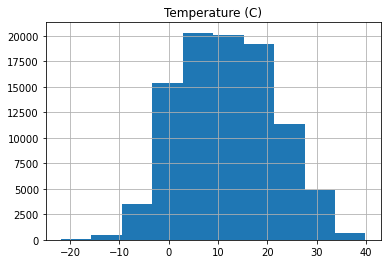

In [ ]:
df.hist("Temperature (C)")              #diagram to show graph of certain coloum
plt.show()

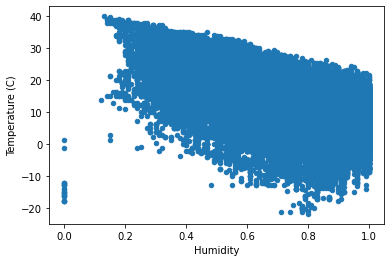

In [ ]:
df.plot.scatter(x="Humidity",y="Temperature (C)")       #diagram to show relation between two coloums by graph

In [ ]:
feature_columns = ['Pressure (millibars)', 'Visibility (km)', 'Wind Speed (km/h)','Wind Bearing (degrees)']
           #define feature coloums
X = df[feature_columns].values
y = df["Precip Type"]

In [ ]:
#  it will give better accuracy
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y = np.array([0 if value == 'rain' else 1 for value in y])     # this is One-hot Encoding which 0 and 1 are used to represent data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)    #training and testing the data


## **KNN**

the k-nearest-neighbor algorithm, or simply k-nn, calculates the likelihood that a data point belongs to one group or the other based on which group the data points closest to it belong.

The k-nearest-neighbor technique is an illustration of a "lazy learner," which means that it waits to use the training set to create a model until a query of the data set is made.

In [ ]:
Classifier = KNeighborsClassifier(n_neighbors=3)      #define of the KNN

In [ ]:
Classifier.fit(X_train,y_train)         #fitting the training data and training our model

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_Classifier = Classifier.predict(X_test)       #predicting the test data

**KNN Model Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred_Classifier)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')     #calculate the accuracy of the model

Accuracy of our model is equal 89.1 %.


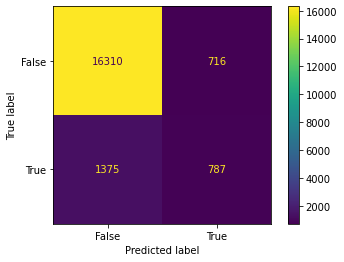

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_Classifier)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **Naive Bayes**

A simple and effective algorithm for the classification task is naive Bayes classification. The foundation of naive Bayes classification is the use of the Bayes theorem with a strong assumption of feature independence. When we apply naive Bayes classification to textual data analysis tasks like natural language processing, we get good outcomes.

In [ ]:
gnb = GaussianNB()      #features that have continuous values

In [ ]:
gnb.fit(X_train, y_train)       #fitting the training data  and training our model

GaussianNB()

In [ ]:
y_pred_gnb = gnb.predict(X_test)        #predicting the testing data

**NB model Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred_gnb)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')     #calculate the accuracy of the model

Accuracy of our model is equal 86.8 %.


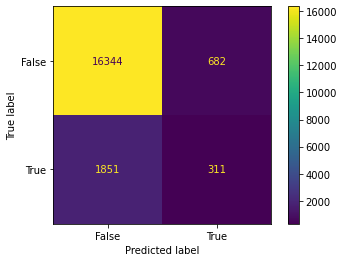

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_gnb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **SVM**


The machine learning algorithm known as a support vector machine (SVM) examines data for regression and classification purposes. A supervised learning technique called SVM sorts data into one of two groups after looking at it. The sorted data are output as a map by an SVM, with the margins between the two being as far away as possible. SVMs are employed in the sciences, picture classification, handwriting recognition, and text categorizati

In [ ]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)           #defining the SVM and training our model with it

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
prediction = svc_model.predict(X_test)    #predicting the SVM model

In [ ]:
y_pred_scv = svc_model.predict(X_test)        #predicting the SVM model

**SVM Model Accuracy**

In [ ]:
y_pred_2 = svc_model.predict(X_test)
accuracy_score(y_test, y_pred_2)
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')        #print the accuracy of the model


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_svc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### **Confusion Matrix**

In [ ]:

actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)     #generate the numbers for actual and predicted values

In [ ]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)      #use the confusion matrix function on our actual and predicted values

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])    #convert the table into a confusion matrix display

In [ ]:
cm_display.plot()
plt.show()            #display the plot